#**Hidden Markov model**
<br>
This example gives a brief introduction to Markov Model and Hidden Markov model(HMM)

In probability theory, a Markov model is a stochastic model used to 
model randomly changing systems where 
It is assumed that future states depend only on the current state not on the events that occurred before it. 
(that is, it assumes the Markov property)
Source: https://en.wikipedia.org/wiki/Markov_model




#<b> Example: Use case of MARKOV AND HIDDEN MARKOV MODEL</b>
<br>
<b>Let's get into a simple example.</b>
Assume that your kid is having her summer vacation and she usually spends time in** 4 ways (which we call as states)**

The 4 ways are:
 
1.   Playing
2.   Eating
3.   Sleeping
4.   Hobying

---




 Assume you want to model the future probability that your kid is in one of these four states given her current state. 
To do this we need to specify
 

1.   The state space
2.   The initial probabilities
3.   TThe transition probabilities



#<b>Import Libaries</b>

In [8]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

<b>Let's say that 
 

1.   The initial probabilities of all these states = 0.3
2.   Except for hobbying which is 0.1 </b>

<br>

---


#Create state space and initial state probabilities

In [ ]:

states = ['playing', 'eating', 'sleeping','hobbying']
pi = [0.3, 0.3, 0.3,0.1]
state_space = pd.Series(pi, index=states, name='states')
print(state_space)
print(state_space.sum())

playing     0.3
eating      0.3
sleeping    0.3
hobbying    0.1
Name: states, dtype: float64
0.9999999999999999


<b>Transition probability</b> means the probablities of staying in the same state or moving to a different state given the current state


1.   Create transition matrix
2.   Equals transition probability matrix of changing states given a state
3.  Matrix is size (M x M) where M is number of states



In [ ]:


t_df = pd.DataFrame(columns=states, index=states)
t_df.loc[states[0]] = [0.4, 0.2, 0.2,0.2]
t_df.loc[states[1]] = [0.4, 0.4, 0.1,0.1]
t_df.loc[states[2]] = [0.4, 0.2, 0.3,0.1]
t_df.loc[states[3]] = [0.3, 0.25, .3,0.15]

print(t_df)




         playing eating sleeping hobbying
playing      0.4    0.2      0.2      0.2
eating       0.4    0.4      0.1      0.1
sleeping     0.4    0.2      0.3      0.1
hobbying     0.3   0.25      0.3     0.15


In [ ]:
q = t_df.values
print('\n', q, q.shape, '\n')
print(t_df.sum(axis=1))



 [[0.4 0.2 0.2 0.2]
 [0.4 0.4 0.1 0.1]
 [0.4 0.2 0.3 0.1]
 [0.3 0.25 0.3 0.15]] (4, 4) 

playing     1.0
eating      1.0
sleeping    1.0
hobbying    1.0
dtype: float64


# This matrix helps us in making us understand the probabilities of what your kid will do given her current state. 
# For example, if her current state is 'playing', there is a 40% chance kid will keep playing, 20% chance of her eating, 20% chance
# that she might sleep or there is a 20% chance that she will pursue one of her hobbies.
# To better understand these transitional probabilties, let us build a network graph.

#Create a function that maps transition probability dataframe 
#To markov edges and weights


In [ ]:


from pprint import pprint 

# create a function that maps transition probability dataframe 
# to markov edges and weights

def _get_markov_edges(Q):
    edges = {}
    for col in Q.columns:
        for idx in Q.index:
            edges[(idx,col)] = Q.loc[idx,col]
    return edges

edges_wts = _get_markov_edges(t_df)
pprint(edges_wts)

{('eating', 'eating'): 0.4,
 ('eating', 'hobbying'): 0.1,
 ('eating', 'playing'): 0.4,
 ('eating', 'sleeping'): 0.1,
 ('hobbying', 'eating'): 0.25,
 ('hobbying', 'hobbying'): 0.15,
 ('hobbying', 'playing'): 0.3,
 ('hobbying', 'sleeping'): 0.3,
 ('playing', 'eating'): 0.2,
 ('playing', 'hobbying'): 0.2,
 ('playing', 'playing'): 0.4,
 ('playing', 'sleeping'): 0.2,
 ('sleeping', 'eating'): 0.2,
 ('sleeping', 'hobbying'): 0.1,
 ('sleeping', 'playing'): 0.4,
 ('sleeping', 'sleeping'): 0.3}


# Let's represent the same in a graphical format

#Create graph object

Nodes:
['playing', 'eating', 'sleeping', 'hobbying']

Edges:
OutMultiEdgeDataView([('playing', 'playing', {'weight': 0.4, 'label': 0.4}), ('playing', 'eating', {'weight': 0.2, 'label': 0.2}), ('playing', 'sleeping', {'weight': 0.2, 'label': 0.2}), ('playing', 'hobbying', {'weight': 0.2, 'label': 0.2}), ('eating', 'playing', {'weight': 0.4, 'label': 0.4}), ('eating', 'eating', {'weight': 0.4, 'label': 0.4}), ('eating', 'sleeping', {'weight': 0.1, 'label': 0.1}), ('eating', 'hobbying', {'weight': 0.1, 'label': 0.1}), ('sleeping', 'playing', {'weight': 0.4, 'label': 0.4}), ('sleeping', 'eating', {'weight': 0.2, 'label': 0.2}), ('sleeping', 'sleeping', {'weight': 0.3, 'label': 0.3}), ('sleeping', 'hobbying', {'weight': 0.1, 'label': 0.1}), ('hobbying', 'playing', {'weight': 0.3, 'label': 0.3}), ('hobbying', 'eating', {'weight': 0.25, 'label': 0.25}), ('hobbying', 'sleeping', {'weight': 0.3, 'label': 0.3}), ('hobbying', 'hobbying', {'weight': 0.15, 'label': 0.15})])


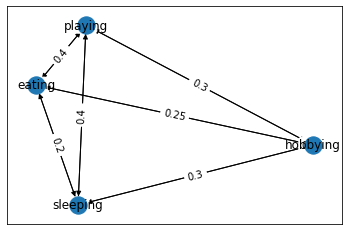

In [ ]:
# Let's represent the same in a graphical format

# create graph object
G = nx.MultiDiGraph()

# nodes correspond to states
G.add_nodes_from(states)
print(f'Nodes:\n{G.nodes()}\n')

# edges represent transition probabilities
for k, v in edges_wts.items():
    tmp_origin, tmp_destination = k[0], k[1]
    G.add_edge(tmp_origin, tmp_destination, weight=v, label=v)
print(f'Edges:')
pprint(G.edges(data=True))    

pos = nx.drawing.nx_pydot.graphviz_layout(G, prog='dot')
nx.draw_networkx(G, pos)

# create edge labels for jupyter plot but is not necessary
edge_labels = {(n1,n2):d['label'] for n1,n2,d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G , pos, edge_labels=edge_labels)
nx.drawing.nx_pydot.write_dot(G, 'kid_markov.dot')

# Now, let's understand what is a Hidden Markov Model(HMM).
#In a Hidden Markov Model (HMM), we have an invisible Markov chain (which we cannot observe), 
#and each state generates in random one out of k observations, which are visible to us.

#In our example, let's consider your kid is cranky and behaving in a strange way. Let's assume that you wanted to model your
#kid's behaviour based on any sickness. To do this, you would wish to check the probability of her being sick or healthy. 

# In this situation, the true state of your kid is unknown, thus hidden from you. One way to model this is to assume that your kid
# has observational behaviour that represents the true & hidden state. 

# Our hidden states will be healthy and sick. 
# create state space and initial state probabilities

In [5]:
import pandas as pd



hidden_states = ['healthy', 'sick']
pi = [0.5, 0.5]
state_space = pd.Series(pi, index=hidden_states, name='states')
print(state_space)
print('\n', state_space.sum())

healthy    0.5
sick       0.5
Name: states, dtype: float64

 1.0


# For these hidden states, we need to create transition matrix (same way as we did for initial states)

# create hidden transition matrix
# a or alpha = transition probability matrix of changing states given a state
# matrix is size (M x M) where M is number of states

In [6]:


a_df = pd.DataFrame(columns=hidden_states, index=hidden_states)
a_df.loc[hidden_states[0]] = [0.65, 0.35]
a_df.loc[hidden_states[1]] = [0.45, 0.55]

print(a_df)

a = a_df.values
print('\n', a, a.shape, '\n')
print(a_df.sum(axis=1))

        healthy  sick
healthy    0.65  0.35
sick       0.45  0.55

 [[0.65 0.35]
 [0.45 0.55]] (2, 2) 

healthy    1.0
sick       1.0
dtype: float64


#This is where it gets a little more interesting. Now we create the emission or observation probability matrix. 
#This matrix is size M x O where M is the number of hidden states and O is the number of possible observable states.
#The emission matrix tells us the probability your kid is in one of the hidden states, given the current, observable state. 
#Let's keep the same observable states from the previous example. 
# The kid can be either be playing, eating, sleeping,or hobbying. For now we make our best guess to fill in the probabilities. 


# create matrix of observation (emission) probabilities
# b or beta = observation probabilities given state
# matrix is size (M x O) where M is number of states 
# and O is number of different possible observations

In [7]:
#This is where it gets a little more interesting. Now we create the emission or observation probability matrix. 
#This matrix is size M x O where M is the number of hidden states and O is the number of possible observable states.
#The emission matrix tells us the probability your kid is in one of the hidden states, given the current, observable state. 
#Let's keep the same observable states from the previous example. 
# The kid can be either be playing, eating, sleeping,or hobbying. For now we make our best guess to fill in the probabilities. 


# create matrix of observation (emission) probabilities
# b or beta = observation probabilities given state
# matrix is size (M x O) where M is number of states 
# and O is number of different possible observations

observable_states = states

b_df = pd.DataFrame(columns=observable_states, index=hidden_states)
b_df.loc[hidden_states[0]] = [0.4, 0.25, 0.1,0.25]
b_df.loc[hidden_states[1]] = [0.2, 0.2, 0.5,0.1]

print(b_df)

b = b_df.values
print('\n', b, b.shape, '\n')
print(b_df.sum(axis=1))

NameError: ignored

# The above matrix means that if your kid is healthy, there is 40% chance of her playing, 25% chance of eating, 10% chance of 
# sleeping and 25% chance of hobbying.

# create graph edges and weights

In [ ]:

hide_edges_wts = _get_markov_edges(a_df)
pprint(hide_edges_wts)

emit_edges_wts = _get_markov_edges(b_df)
pprint(emit_edges_wts)

{('healthy', 'healthy'): 0.65,
 ('healthy', 'sick'): 0.35,
 ('sick', 'healthy'): 0.45,
 ('sick', 'sick'): 0.55}
{('healthy', 'eating'): 0.25,
 ('healthy', 'hobbying'): 0.25,
 ('healthy', 'playing'): 0.4,
 ('healthy', 'sleeping'): 0.1,
 ('sick', 'eating'): 0.2,
 ('sick', 'hobbying'): 0.1,
 ('sick', 'playing'): 0.2,
 ('sick', 'sleeping'): 0.5}


Nodes:
['healthy', 'sick']

Edges:
OutMultiEdgeDataView([('healthy', 'healthy', {'weight': 0.65, 'label': 0.65}), ('healthy', 'sick', {'weight': 0.35, 'label': 0.35}), ('healthy', 'playing', {'weight': 0.4, 'label': 0.4}), ('healthy', 'eating', {'weight': 0.25, 'label': 0.25}), ('healthy', 'sleeping', {'weight': 0.1, 'label': 0.1}), ('healthy', 'hobbying', {'weight': 0.25, 'label': 0.25}), ('sick', 'healthy', {'weight': 0.45, 'label': 0.45}), ('sick', 'sick', {'weight': 0.55, 'label': 0.55}), ('sick', 'playing', {'weight': 0.2, 'label': 0.2}), ('sick', 'eating', {'weight': 0.2, 'label': 0.2}), ('sick', 'sleeping', {'weight': 0.5, 'label': 0.5}), ('sick', 'hobbying', {'weight': 0.1, 'label': 0.1})])


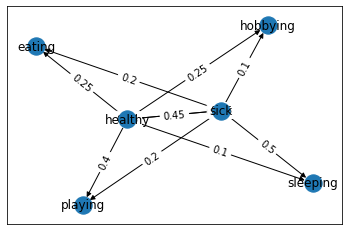

In [ ]:
# Let's represent the same in a network graph as we did earlier for initial states.

# create graph object
G = nx.MultiDiGraph()

# nodes correspond to states
G.add_nodes_from(hidden_states)
print(f'Nodes:\n{G.nodes()}\n')

# edges represent hidden probabilities
for k, v in hide_edges_wts.items():
    tmp_origin, tmp_destination = k[0], k[1]
    G.add_edge(tmp_origin, tmp_destination, weight=v, label=v)

# edges represent emission probabilities
for k, v in emit_edges_wts.items():
    tmp_origin, tmp_destination = k[0], k[1]
    G.add_edge(tmp_origin, tmp_destination, weight=v, label=v)
    
print(f'Edges:')
pprint(G.edges(data=True))    

pos = nx.drawing.nx_pydot.graphviz_layout(G, prog='neato')
nx.draw_networkx(G, pos)

# create edge labels for jupyter plot but is not necessary
emit_edge_labels = {(n1,n2):d['label'] for n1,n2,d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G , pos, edge_labels=emit_edge_labels)
nx.drawing.nx_pydot.write_dot(G, 'kid_hidden_markov.dot')

In [ ]:
#The hidden Markov graph is a little more complex but the principles are the same. 
#For example, you would expect that if your kid is sleeping, there is a high probability that she is sick (50%) and 
#a low probability that your kid is healthy (10%).

#Now, what if you needed to discern the health of your kid over time given a sequence of observations?  


# observation sequence of kid's behaviors
# observations are encoded numerically

obs_map = {'playing':0, 'eating':1, 'sleeping':2, 'hobbying':3}
obs = np.array([1,3,2,1,0,1,2,3,0,2,2,0,1,0,1])

inv_obs_map = dict((v,k) for k, v in obs_map.items())
obs_seq = [inv_obs_map[v] for v in list(obs)]

print( pd.DataFrame(np.column_stack([obs, obs_seq]), 
                columns=['Obs_code', 'Obs_seq']) )

   Obs_code   Obs_seq
0         1    eating
1         3  hobbying
2         2  sleeping
3         1    eating
4         0   playing
5         1    eating
6         2  sleeping
7         3  hobbying
8         0   playing
9         2  sleeping
10        2  sleeping
11        0   playing
12        1    eating
13        0   playing
14        1    eating


In [9]:
#Using the Viterbi algorithm we can identify the most likely sequence of hidden states given the sequence of observations.
#At a high level, the Viterbi algorithm increments over each time step, finding the maximum probability of any path that 
#gets to state i at time t, that also has the correct observations for the sequence up to time t.
#The algorithm also keeps track of the state with the highest probability at each stage. 
#At the end of the sequence, the algorithm will iterate backwards selecting the state that "won" each time step, 
#and thus creating the most likely path, or likely sequence of hidden states that led to the sequence of observations.


# define Viterbi algorithm for shortest path
# code adapted from Stephen Marsland's, Machine Learning An Algorthmic Perspective, Vol. 2
# https://github.com/alexsosn/MarslandMLAlgo/blob/master/Ch16/HMM.py

def viterbi(pi, a, b, obs):
    
    nStates = np.shape(b)[0]
    T = np.shape(obs)[0]
    
    # init blank path
    path = np.zeros(T)
    # delta --> highest probability of any path that reaches state i
    delta = np.zeros((nStates, T))

    # phi --> argmax by time step for each state
    phi = np.zeros((nStates, T))
    
    # init delta and phi 
    delta[:, 0] = pi * b[:, obs[0]]
    phi[:, 0] = 0

    print('\nStart Walk Forward\n')    
    # the forward algorithm extension
    for t in range(1, T):
        for s in range(nStates):
            delta[s, t] = np.max(delta[:, t-1] * a[:, s]) * b[s, obs[t]] 
            phi[s, t] = np.argmax(delta[:, t-1] * a[:, s])
            print('s={s} and t={t}: phi[{s}, {t}] = {phi}'.format(s=s, t=t, phi=phi[s, t]))
    
    # find optimal path
    print('-'*50)
    print('Start Backtrace\n')
    #print("Path-1", path)
    path[T-1] = np.argmax(delta[:, T-1])
    #print("Path-2", path)
    #path('init path\n    t={} path[{}-1]={}\n'.format(T-1, T, path[T-1]))
    for t in range(T-2, -1, -1):
        phi[int(path[t+1]), [t+1]]
        #print("phi-", phi[int(path[t+1]), [t+1]])
        path[t] = phi[int(path[t+1]), [t+1]]
        #p(' '*4 + 't={t}, path[{t}+1]={path}, [{t}+1]={i}'.format(t=t, path=path[t+1], i=[t+1]))
        print('path[{}] = {}'.format(t, path[t]))
        
    return path, delta, phi



In [10]:
path, delta, phi = viterbi(pi, a, b, obs)
print('\nsingle best state path: \n', path)
print('delta:\n', delta)
print('phi:\n', phi)

NameError: ignored

In [ ]:
state_map = {0:'healthy', 1:'sick'}
state_path = [state_map[v] for v in path]

(pd.DataFrame()
 .assign(Observation=obs_seq)
 .assign(Best_Path=state_path))

,Observation,Best_Path
0,eating,healthy
1,hobbying,healthy
2,sleeping,sick
3,eating,healthy
4,playing,healthy
5,eating,healthy
6,sleeping,sick
7,hobbying,healthy
8,playing,healthy
9,sleeping,sick


In [ ]:
## The above table gives the best hidden state at any current state. 
#It is very clear from the table that if the observation is sleeping, there is a high chance that your kid is sleeping
# Obviously it should be understood that sleeping doesn't just mean sleeping but sleeping more that the regular sleeping time. 